# Importing Needed Liberaries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gradio as gr
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2

# Importing Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()


(np.uint8(0), np.uint8(255), np.uint8(0), np.uint8(255))

# Visualize a sample image

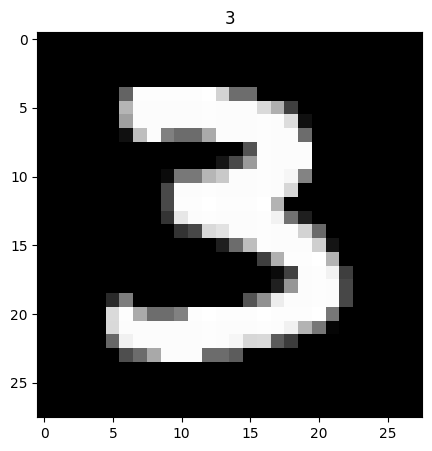

In [5]:
random_num = np.random.randint(0, len(X_train))
plt.figure(figsize=(5, 5))
plt.imshow(X_train[random_num], cmap='gray')
plt.title(y_train[random_num])
plt.show()


# Flatten and Normalize the images

In [6]:
X_train = X_train.reshape(-1, 784) / 255
X_test = X_test.reshape(-1, 784) / 255


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 784), (60000,), (10000, 784), (10000,))

In [8]:
X_train.min(), X_train.max(), X_test.min(), X_test.max()


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

In [9]:
X_train[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
y_train[0]


np.uint8(5)

# Keras Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [12]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [13]:
y_train.shape, y_test.shape


((60000, 10), (10000, 10))

In [14]:
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
# Build the model.
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model.
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary.
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

## Model Summary

> First Hidden Layer
* No. of inputs:  784
* No. of neurons in hidden layer 1:  64
* Total No. of Parameters:  784*64 (Input-hidden1 weights) + 64 (hidden1 biases)= 50240

> Second Hidden Layer
* No. of inputs:  64
* No. of neurons in hidden layer 2:  64
* Total No. of Parameters:  64*64 (hidden1-hidden2 weights) + 64 (hidden2 biases)= 4160

> Output Layer
* No. of inputs:  64
* No. of neurons in output layer:  10
* Total No. of Parameters:  64*10 (hidden2-output weights) + 10 (output biases)= 650

> Total No. of Parameters:  50240+4160+650= 55050

# Train the model.

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32)
print("Training complete.\n")

# Evaluate the model.
print("Evaluating the model on test data...")
model.evaluate(X_test, y_test)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8565 - loss: 0.4955
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.1301
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9721 - loss: 0.0928
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9785 - loss: 0.0687
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0531
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0480
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0392
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0313
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0296
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0258
Training complete.

Evaluating the model on test data...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9712 - 

[0.1006806269288063, 0.9751999974250793]

In [17]:
# Batch vs Epoch
batch_size = 32
training_samples = 60000
iterations_per_epoch = training_samples/batch_size
iterations_per_epoch


1875.0

# Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


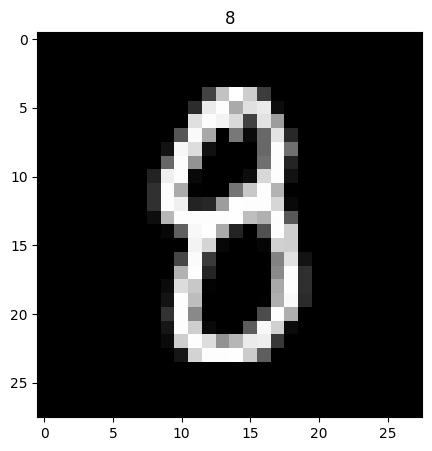

In [19]:
test_num = np.random.randint(0, len(X_test))
plt.figure(figsize=(5, 5))
plt.title(model.predict(X_test[test_num].reshape(1, 784)).argmax())
plt.imshow(X_test[test_num].reshape(28, 28), cmap='gray')

# Saving The Model

In [20]:
model.save('my_model.keras')